In [1]:
import requests
import lxml.html
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
response = requests.get('https://www.rockethomes.com/mi/ann-arbor')
soup = BeautifulSoup(response.text, 'lxml')

Web scraping

In [2]:
def city_list():
    link9=[]
    link10=[]
    link11=[]
    link12=[]
    link13=[]
    for itemText in soup.find_all('div', class_="col-xs-12 positionRelative"):
         uTags = itemText.find_all('a')  
         for tag in soup.find_all('div', class_="h4"):
            link9.append(tag.text)
    for itemText in soup.find_all('div', class_="col-xs-12 positionRelative"):
         uTags = itemText.find_all('a')  
         for tag in soup.find_all('div', class_="p1 lh18 marginT8"):
            link10.append(tag.text)        
    for itemText in soup.find_all('div', class_="col-xs-12 positionRelative"):
         uTags = itemText.find_all('a')  
         for tag in soup.find_all('div', class_="p2 lh18 textRight"):
            link11.append(tag.text)          
    for itemText in soup.find_all('div', class_="col-xs-12 positionRelative"):
         uTags = itemText.find_all('a')  
         for tag in soup.find_all('div', class_="positionAbsolute left0 right0 bottom0 pointerNone p4 lh20 colorWhite paddingY8 paddingX16"):
            link12.append(tag.text)        
    for itemText in soup.find_all('div', class_="col-xs-12 positionRelative"):
         uTags = itemText.find_all('a')  
         for tag in soup.find_all('div', class_="p2 textRight lh32 colorObsidian marginB8"):
            link13.append(tag.text)       
    return link9,link10,link11,link12,link13       

link9,link10,link11,link12,link13 = city_list()


Speliting bad and beth in two seperate string like 2bed•3baths into 2bed and 3baths
creating housing datafrme
 

In [3]:
#to pass 
bedbeth = []
#empty list for bed 

#function for spliting bed&bath and removing bath and bed words and aslo ponctuations
def splitingg_bed_bath(badbeth):
    link14 = []
#empty list forr bath
    link15 = []
    link16 = []
    length = len(link10)
    for i in range(length):
      link9[i] = link9[i].replace('$', '').replace(',','.')
      link10[i] = link10[i].replace("~", "").replace('*', '')
      link11[i] = link11[i].replace('SqFt', '').replace(',','.')
      link14.append(badbeth[i].split('•')[0])
      link14[i] = link14[i].replace('Beds', '').replace('Bed','') 
      link15.append(badbeth[i].split('•')[1])
      link15[i] = link14[i].replace('Baths', '').replace('Bath','')
      link16.append(link12[i].split(',')[2]) 
      link16[i] = link16[i].replace('MI', '').replace(' ','')  
    return link9,link10,link14,link15,link16    

 
#calling function
link9,link10,link14,link15,link16=splitingg_bed_bath(link13)

#for i in range(length):
# link16.append(link12[i].split(',')[2])     
        

    
df40 = pd.DataFrame(list(zip(link9, link10 , link11, link12 ,link14 , link15 , link16)), 
               columns =['price', 'Morgae_rate','size','addresss','bed','bath','zip_code'])  
 

df40

,price,Morgae_rate,size,addresss,bed,bath,zip_code
0,625.000,"$2,200/mo.",2.487,"825 Watershed Dr, Ann Arbor, MI 48105",3,3,48105
1,379.000,"$1,300/mo.",1.750,"1827 Pontiac Trl, Ann Arbor, MI 48105",3,3,48105
2,269.900,$950/mo.,1.450,"532 Liberty Pointe Dr, Ann Arbor, MI 48103",3,3,48103
3,304.900,"$1,050/mo.",1.768,"210 W Oakbrook Dr, Ann Arbor, MI 48103",3,3,48103
4,395.000,"$1,400/mo.",1.593,"2506 W Liberty, Ann Arbor, MI 48103",2,2,48103
5,250.000,$850/mo.,984,"16 Revere Ct, Ann Arbor, MI 48104",3,3,48104
6,338.500,"$1,200/mo.",1.508,"2541 Meade Ct, Ann Arbor, MI 48105",3,3,48105
7,400.000,"$1,400/mo.",1.515,"216 Bucholz Ct, Ann Arbor, MI 48103",3,3,48103
8,290.000,"$1,000/mo.",1.769,"314 Hilldale Dr, Ann Arbor, MI 48105",3,3,48105
9,587.690,"$2,050/mo.",3.106,"3655 Bella Vista Dr, Ann Arbor, MI 48105",5,5,48105


Changing data type from object to int and float

In [32]:
import numpy as np

df40["price"] = df40["price"].astype(int)
df40["bed"] = df40["bed"].astype(int)
df40["bath"] = df40["bath"].astype(int)
df40["zip_code"] = df40["zip_code"].astype(int)
df40["size"] = df40["size"].astype(int)


In [33]:
df40["price"].describe()

count    1275.000000
mean      393.360000
std       148.957017
min       168.000000
25%       290.000000
50%       369.000000
75%       485.000000
max       750.000000
Name: price, dtype: float64

Data visulizatoion

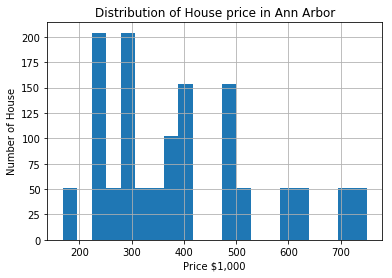

In [34]:
df40["price"].hist(bins=21,linewidth=1)
plt.xlabel("Price $1,000")
plt.ylabel("Number of House")
plt.title("Distribution of House price in Ann Arbor")
 
plt.show()

see normallization without noise

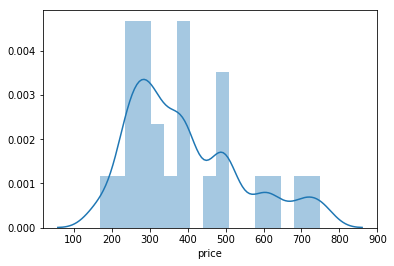

In [35]:
sns.distplot(df40["price"])

data visulization for correlation

,price,size,bed,bath,zip_code
price,1.000000,-0.367356,0.686288,0.686288,-0.190377
size,-0.367356,1.000000,-0.384698,-0.384698,-0.054303
bed,0.686288,-0.384698,1.000000,1.000000,0.023182
bath,0.686288,-0.384698,1.000000,1.000000,0.023182
zip_code,-0.190377,-0.054303,0.023182,0.023182,1.000000


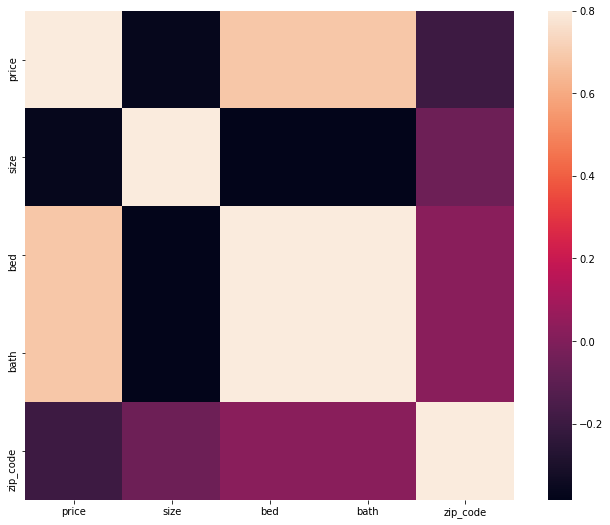

In [36]:
from scipy.stats.stats import pearsonr
from matplotlib import pyplot as plt
corrmat = df40.corr(method='pearson')
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
corrmat

logorithm historam

In [37]:
from scipy import stats


mu = 393.36 and sigma = 148.90


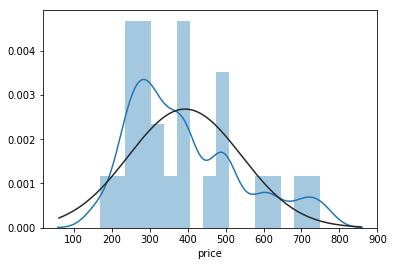

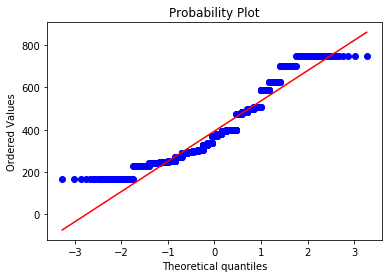

transformed mu = 5.91 and transformed sigma = 0.37


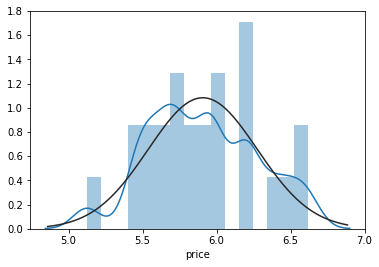

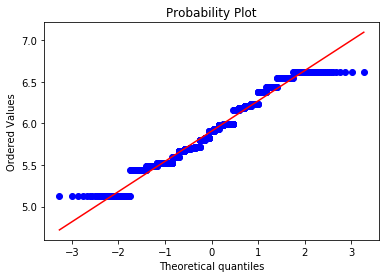

In [38]:
sns.distplot(df40['price'], fit=stats.norm)

(mu, sigma) = stats.norm.fit(df40['price'])
print('mu = {:,.2f} and sigma = {:,.2f}'.format(mu, sigma))
# Q-Q plot:
fig = plt.figure()
res = stats.probplot(df40['price'], plot=plt)
plt.show()

# Apply Log transform to SalePrice (y in training data)
y = np.log(y)
# Distribution Plot
sns.distplot(y, fit=stats.norm)
(mu, sigma) = stats.norm.fit(y)
print('transformed mu = {:,.2f} and transformed sigma = {:,.2f}'.format(mu, sigma))
# QQ Plot
fig = plt.figure()
res = stats.probplot(y, plot=plt)
plt.show()



Prediction using XGBRegressor

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
#df41=df40.drop(columns=['Morgae_rate', 'addresss'])
#df41.set_index('price', inplace=True)
#df41

In [40]:
df40.dropna(axis=0, subset=['price'], inplace=True)
y = df40.price
X = df40.drop(['price'], axis=1).select_dtypes(exclude=['object'])
train_X, test_X, train_y, test_y = train_test_split(X.as_matrix(), y.as_matrix(), test_size=0.25)

my_imputer = Imputer()
train_X = my_imputer.fit_transform(train_X)
test_X = my_imputer.transform(test_X)

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [41]:
from xgboost import XGBRegressor

my_model = XGBRegressor()
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(train_X, train_y, verbose=False)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
       validate_parameters=False, verbosity=None)

In [42]:
predictions = my_model.predict(test_X)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_y)))

Mean Absolute Error : 35.53874244809524


In [43]:
my_model.score(test_X,test_y)

0.8642162472326753

In [44]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test_y, predictions))

In [45]:
print("RMSE: %f" % (rmse))

RMSE: 53.935365


In [ ]:
Prediction using LogisticRegression

In [46]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(train_X, train_y)

#
y_pred=logreg.predict(test_X)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [48]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(test_y, y_pred)
cnf_matrix

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 15,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 11,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 14,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 14,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 14,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  9,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 10,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 10,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 20,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0, 

Text(0.5, 257.44, 'Predicted label')

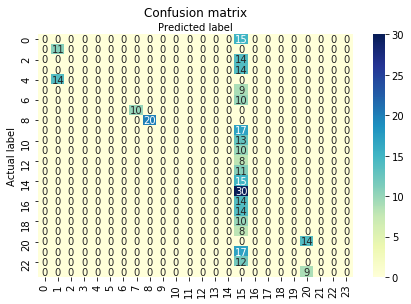

In [49]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [51]:
print("Accuracy:",metrics.accuracy_score(test_y, y_pred))


Accuracy: 0.2664576802507837
